---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
data1 = pd.read_csv('Employee_Movie_Choices.txt', sep='\t')
data1.head()

,#Employee,Movie
0,Andy,Anaconda
1,Andy,Mean Girls
2,Andy,The Matrix
3,Claude,Anaconda
4,Claude,Monty Python and the Holy Grail


In [3]:
def answer_one():
        
    # Your Code Here
    G1 = nx.from_pandas_dataframe(data1, '#Employee', 'Movie')
    
    return G1

answer_one()

<IPython.core.display.Javascript object>


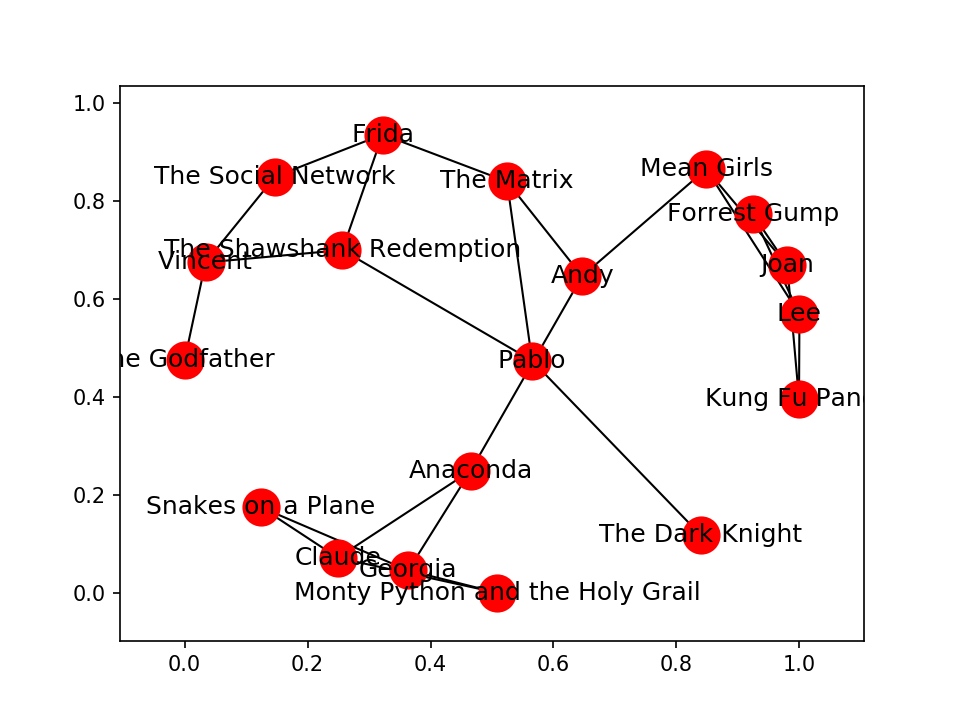

In [4]:
plot_graph(answer_one())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [5]:
def answer_two():
    
    # Your Code Here
    G2 = answer_one()
    for node in G2.nodes():
        if node in movies:
            G2.add_node(node, type="movies")
        elif node in employees:
            G2.add_node(node, type="employee")
            
    return G2

answer_two()

<IPython.core.display.Javascript object>


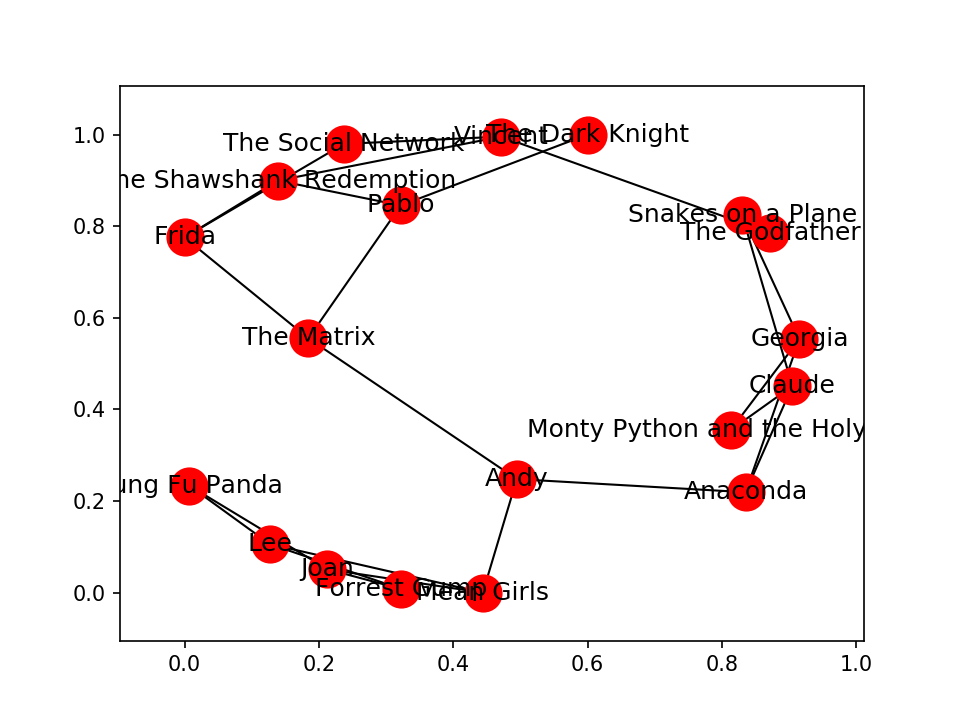

In [6]:
plot_graph(answer_two())

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [7]:
def answer_three():
        
    # Your Code Here
    G3 = answer_two()
    weighted = bipartite.weighted_projected_graph(G3, employees)
    
    return weighted

answer_three()

<IPython.core.display.Javascript object>


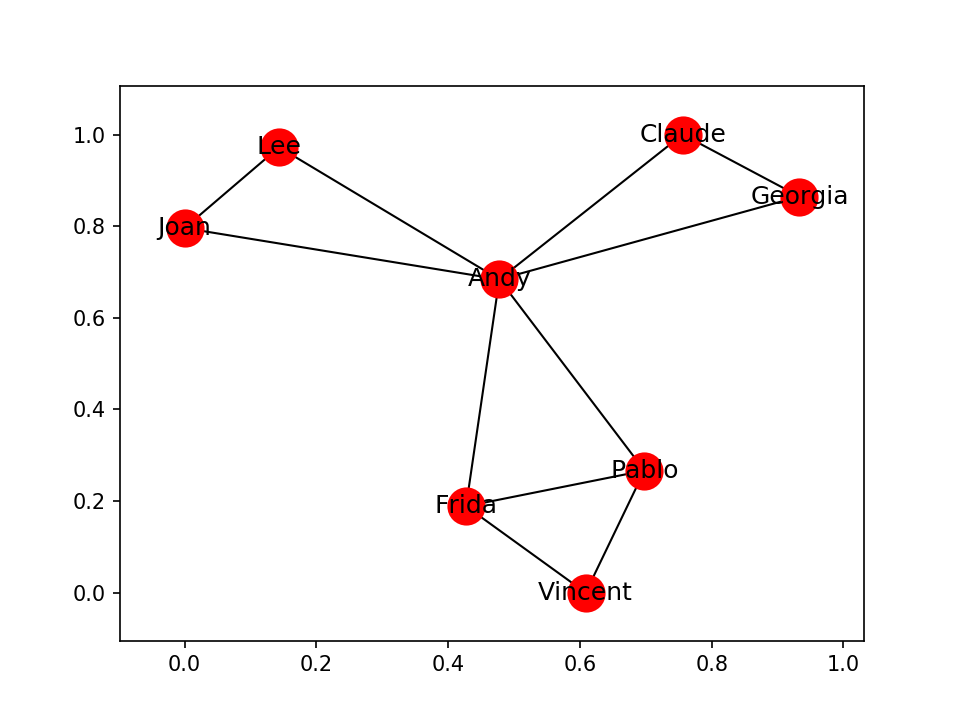

In [8]:
plot_graph(answer_three())

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [9]:
data2 = pd.read_csv('Employee_Relationships.txt', sep='\t', header=None, names=['Employee_1', 'Employee_2', 'Relationship'])
data2.head()

,Employee_1,Employee_2,Relationship
0,Andy,Claude,0
1,Andy,Frida,20
2,Andy,Georgia,-10
3,Andy,Joan,30
4,Andy,Lee,-10


In [10]:
def answer_four():
        
    # Your Code Here
    #Accessing the network data from Question 3
    G4 = answer_three()
    G4_df1 = pd.DataFrame(G4.edges(data=True), columns=['Employee_1', 'Employee_2', 'Common Movies'])
    
    #The common movies column is in dictionary type. Accessing the required value form it.
    G4_df1['Common Movies'] = G4_df1['Common Movies'].map(lambda x: x['weight'])
    print("Common movies vs different pairs of employees:\n", G4_df1.head())
    
    #Creating a network from the relation data & accessing the network data
    X = nx.from_pandas_dataframe(data2, 'Employee_1', 'Employee_2', 'Relationship')
    X_df = pd.DataFrame(X.edges(data=True), columns=['Employee_1', 'Employee_2', 'Relationship'])
    
    #The Relation columns are in dictionary type. Accessing the required value form it.
    X_df['Relationship'] = X_df['Relationship'].map(lambda x: x['Relationship'])
    print("\n Relationships between different coworkers: \n", X_df.head())
    
    #interchanging the employees
    G4_df2 = G4_df1.copy()
    G4_df2.rename(columns={"Employee_1":"Employee_2", "Employee_2":"Employee_1"}, inplace=True)
        
    G4_df3 = pd.concat([G4_df1, G4_df2])
      
    G_df = pd.merge(G4_df3, X_df, on = ['Employee_1', 'Employee_2'], how='right')
    
    # The above dataframe has NAN values in the Common Movies column caused by the X_df dataframe
    #setting value of the NANs to 0
    G_df['Common Movies'] = G_df['Common Movies'].fillna(0)
        
    print("\nFinal Required DataFrame to Calculate Correlation:\n", G_df.head())
    
    value = G_df['Common Movies'].corr(G_df['Relationship'])
    
    return value
corr = answer_four()

Common movies vs different pairs of employees:
   Employee_1 Employee_2  Common Movies
0       Andy       Joan              1
1       Andy      Frida              1
2       Andy     Claude              1
3       Andy        Lee              1
4       Andy    Georgia              1

 Relationships between different coworkers: 
   Employee_1 Employee_2  Relationship
0       Andy     Claude             0
1       Andy      Frida            20
2       Andy    Georgia           -10
3       Andy       Joan            30
4       Andy        Lee           -10

Final Required DataFrame to Calculate Correlation:
    Common Movies Employee_1 Employee_2  Relationship
0            1.0       Andy       Joan            30
1            1.0       Andy      Frida            20
2            1.0       Andy     Claude             0
3            1.0       Andy        Lee           -10
4            1.0       Andy    Georgia           -10


In [11]:
print("Pearson correlation between employee relationship scores and the number of movies they have in common:", corr)

Pearson correlation between employee relationship scores and the number of movies they have in common: 0.788396222173
